This is to develop some test cases for the PAL function. 

In [61]:
import matplotlib.pyplot as plt 
%matplotlib inline 

%load_ext autoreload
%autoreload 2

2020-06-17 10:05:47,434 matplotlib.pyplot DEBUG    Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [62]:
from sklearn.datasets import make_regression

In [185]:
X,y =  make_regression(n_samples=100, n_features=2, n_informative=1, n_targets=1, noise=10)

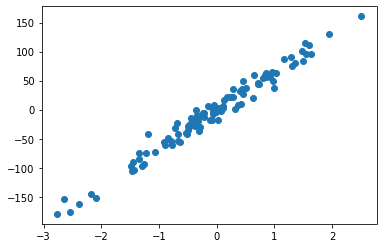

In [186]:
plt.scatter(X[:,0], y)

Here, there is one optimal point.

In [187]:
import sys

In [188]:
sys.path.append('../')

In [253]:
from dispersant_screener.pal import pal
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, RationalQuadratic, Matern, RationalQuadratic
from sklearn.preprocessing import StandardScaler

In [298]:
gpr = GaussianProcessRegressor(kernel = RationalQuadratic(), normalize_y=True, n_restarts_optimizer=10)

In [299]:
from sklearn.model_selection import train_test_split

In [300]:
y = y.reshape(-1,1)

In [301]:
sc = StandardScaler()

In [302]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.1)

In [303]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [304]:
pareto_optimal, hypervolumes = pal([gpr], X_train, y_train, X_test, y_test, hv_reference=[10])

2020-06-17 11:15:10,787 root         INFO     Starting now the PAL loop
2020-06-17 11:15:10,787 root         INFO     Starting now the PAL loop
2020-06-17 11:15:10,787 root         INFO     Starting now the PAL loop
2020-06-17 11:15:10,787 root         INFO     Starting now the PAL loop
2020-06-17 11:15:10,787 root         INFO     Starting now the PAL loop
2020-06-17 11:15:10,787 root         INFO     Starting now the PAL loop
2020-06-17 11:15:10,787 root         INFO     Starting now the PAL loop
2020-06-17 11:15:10,787 root         INFO     Starting now the PAL loop
2020-06-17 11:15:10,787 root         INFO     Starting now the PAL loop
2020-06-17 11:15:10,787 root         INFO     Starting now the PAL loop
2020-06-17 11:15:10,787 root         INFO     Starting now the PAL loop
2020-06-17 11:15:10,787 root         INFO     Starting now the PAL loop
2020-06-17 11:15:10,787 root         INFO     Starting now the PAL loop
2020-06-17 11:15:10,787 root         INFO     Starting now the P

2020-06-17 11:15:10,984 root         DEBUG    Scaling parameter beta at the current iteration is 15.986484492710002
2020-06-17 11:15:10,984 root         DEBUG    Scaling parameter beta at the current iteration is 15.986484492710002
2020-06-17 11:15:10,993 root         DEBUG    mean array shape: (90, 1), std array shape: (90, 1)
2020-06-17 11:15:10,993 root         DEBUG    mean array shape: (90, 1), std array shape: (90, 1)
2020-06-17 11:15:10,993 root         DEBUG    mean array shape: (90, 1), std array shape: (90, 1)
2020-06-17 11:15:10,993 root         DEBUG    mean array shape: (90, 1), std array shape: (90, 1)
2020-06-17 11:15:10,993 root         DEBUG    mean array shape: (90, 1), std array shape: (90, 1)
2020-06-17 11:15:10,993 root         DEBUG    mean array shape: (90, 1), std array shape: (90, 1)
2020-06-17 11:15:10,993 root         DEBUG    mean array shape: (90, 1), std array shape: (90, 1)
2020-06-17 11:15:10,993 root         DEBUG    mean array shape: (90, 1), std array

2020-06-17 11:15:11,202 root         DEBUG    Starting iteration 2
2020-06-17 11:15:11,202 root         DEBUG    Starting iteration 2
2020-06-17 11:15:11,202 root         DEBUG    Starting iteration 2
2020-06-17 11:15:11,202 root         DEBUG    Starting iteration 2
2020-06-17 11:15:11,234 root         DEBUG    Starting modeling step, fitting the GPs
2020-06-17 11:15:11,234 root         DEBUG    Starting modeling step, fitting the GPs
2020-06-17 11:15:11,234 root         DEBUG    Starting modeling step, fitting the GPs
2020-06-17 11:15:11,234 root         DEBUG    Starting modeling step, fitting the GPs
2020-06-17 11:15:11,234 root         DEBUG    Starting modeling step, fitting the GPs
2020-06-17 11:15:11,234 root         DEBUG    Starting modeling step, fitting the GPs
2020-06-17 11:15:11,234 root         DEBUG    Starting modeling step, fitting the GPs
2020-06-17 11:15:11,234 root         DEBUG    Starting modeling step, fitting the GPs
2020-06-17 11:15:11,234 root         DEBUG  

2020-06-17 11:15:11,616 root         DEBUG    first low: -15.525339432200724, first up: -10.028642283370106
2020-06-17 11:15:11,616 root         DEBUG    first low: -15.525339432200724, first up: -10.028642283370106
2020-06-17 11:15:11,616 root         DEBUG    first low: -15.525339432200724, first up: -10.028642283370106
2020-06-17 11:15:11,630 root         DEBUG    rectangle lows shape (90, 1), rectangle ups shape (90, 1)
2020-06-17 11:15:11,630 root         DEBUG    rectangle lows shape (90, 1), rectangle ups shape (90, 1)
2020-06-17 11:15:11,630 root         DEBUG    rectangle lows shape (90, 1), rectangle ups shape (90, 1)
2020-06-17 11:15:11,630 root         DEBUG    rectangle lows shape (90, 1), rectangle ups shape (90, 1)
2020-06-17 11:15:11,630 root         DEBUG    rectangle lows shape (90, 1), rectangle ups shape (90, 1)
2020-06-17 11:15:11,630 root         DEBUG    rectangle lows shape (90, 1), rectangle ups shape (90, 1)
2020-06-17 11:15:11,630 root         DEBUG    rectan

In [305]:
np.where(np.array(pareto_optimal)==1)[0][0]

24

In [306]:
y_test[24]

array([88.03490442])

In [307]:
np.max(y_test)

160.82386849946823

In [308]:
gpr.fit(X_train, y_train)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                         kernel=RationalQuadratic(alpha=1, length_scale=1),
                         n_restarts_optimizer=10, normalize_y=True,
                         optimizer='fmin_l_bfgs_b', random_state=None)

In [309]:
y_pred = gpr.predict(X_test)

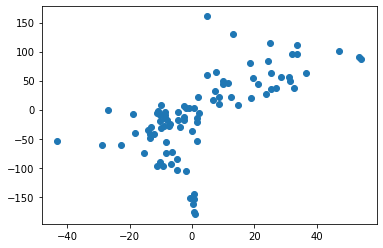

In [310]:
plt.scatter(y_pred, y_test)